In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Stop existing Spark session if it exists
if 'spark' in locals() and spark is not None:
    spark.stop()

In [3]:
spark = SparkSession.builder.appName("AnimeDataAnalysis").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/10 21:18:27 INFO SparkEnv: Registering MapOutputTracker
23/12/10 21:18:27 INFO SparkEnv: Registering BlockManagerMaster
23/12/10 21:18:27 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/10 21:18:27 INFO SparkEnv: Registering OutputCommitCoordinator


In [4]:
#Loading the data:

path = 'gs://result_final/anime_cleaned.csv'
file_type = "csv"

#CSV
infer_schema = 'true'
first_row_is_header = 'true'
delimiter = ','


#Import csv

df = spark.read.format(file_type)\
    .option("inferSchema",infer_schema)\
    .option("header", first_row_is_header) \
    .option("sep", delimiter)\
    .load(path)

In [5]:
df.show(10)

+-------+--------+------+
|user_id|anime_id|rating|
+-------+--------+------+
|      0|      67|     9|
|      0|    6702|     7|
|      0|     242|    10|
|      0|    4898|     0|
|      0|      21|    10|
|      0|      24|     9|
|      0|    2104|     0|
|      0|    4722|     8|
|      0|    6098|     6|
|      0|    3125|     9|
+-------+--------+------+
only showing top 10 rows



In [6]:
df.describe().show(10)

+-------+------------------+------------------+------------------+
|summary|           user_id|          anime_id|            rating|
+-------+------------------+------------------+------------------+
|  count|         109224747|         109224747|         109224747|
|   mean| 176809.8033905082|16495.898683921878| 4.245716641486018|
| stddev|101848.72778949991|13797.366206776518|3.9128884612566006|
|    min|                 0|                 1|                 0|
|    max|            353404|             48492|                10|
+-------+------------------+------------------+------------------+



In [7]:
total_rows = df.count()
print("Total number of rows:", total_rows)

Total number of rows: 109224747


In [9]:
# Perform complex queries and data transformations
# Calculate the average rating per user
average_rating_per_user = (
    df.groupBy("user_id")
    .agg({"rating": "avg"})
    .withColumnRenamed("avg(rating)", "average_rating")
)

In [10]:
# Print the average rating per user
print("Average Rating per User:")
average_rating_per_user.show()

Average Rating per User:


+-------+-------------------+
|user_id|     average_rating|
+-------+-------------------+
|  33375|0.16336633663366337|
|  33412|  2.689189189189189|
|  33602| 5.5326460481099655|
|  33868|  6.052873563218391|
|  34061|  8.180327868852459|
|  34234|                0.0|
|  34759|                7.5|
|  35071|   5.97153024911032|
|  35361|  5.632183908045977|
|  35689|  4.332896461336828|
|  35694|  2.249475890985325|
|  35820|  6.714285714285714|
|  35912|  4.192139737991266|
|  35947|  7.732142857142857|
|  35982|  7.305882352941176|
|  36224|  7.490066225165563|
|  36525|         2.45703125|
|  37111|  4.689873417721519|
|  37146|  5.037037037037037|
|  37251|  6.510835913312693|
+-------+-------------------+
only showing top 20 rows



In [11]:
#Categorize ratings into different groups
from pyspark.sql.functions import when
from pyspark.sql.functions import col, when

categorized_data = df.withColumn(
    "rating_category",
    when(col("rating") >= 8, "High").when((col("rating") >= 5) & (col("rating") < 8), "Medium").otherwise("Low")
)

In [12]:
# Show the results
categorized_data.show(5)

+-------+--------+------+---------------+
|user_id|anime_id|rating|rating_category|
+-------+--------+------+---------------+
|      0|      67|     9|           High|
|      0|    6702|     7|         Medium|
|      0|     242|    10|           High|
|      0|    4898|     0|            Low|
|      0|      21|    10|           High|
+-------+--------+------+---------------+
only showing top 5 rows



In [13]:
# Perform additional data analysis for insights
# Example 1: Analyze distribution of ratings
rating_distribution = df.groupBy("rating").count().orderBy("rating")
rating_distribution.show()

+------+--------+
|rating|   count|
+------+--------+
|     0|46827035|
|     1|  480688|
|     2|  545339|
|     3|  905700|
|     4| 1845854|
|     5| 4029645|
|     6| 7543377|
|     7|14244633|
|     8|15422150|
|     9|10235934|
|    10| 7144392|
+------+--------+



In [14]:
# Example 2: Analyze average rating per anime category
average_rating_per_category = (
    df.groupBy("anime_id")
    .agg({"rating": "avg"})
    .withColumnRenamed("avg(rating)", "average_rating")
    .orderBy("average_rating", ascending=False)
)
average_rating_per_category.show()

+--------+------------------+
|anime_id|    average_rating|
+--------+------------------+
|    1535| 7.060513421835085|
|    2904| 7.053377390862299|
|   38524| 7.035414608668006|
|   32281| 7.009765401487698|
|     199| 6.966887622928923|
|   16498| 6.955048508306153|
|   30276| 6.923540025874396|
|   32935| 6.842731976949312|
|   28851|  6.67344228729126|
|   28891| 6.650942346907248|
|     431|6.6355426960951895|
|    5114| 6.624102851530918|
|   33486| 6.575849806905517|
|   26055| 6.502395811035551|
|    1575| 6.461572998916241|
|   11741| 6.427825151011849|
|   31964|  6.41949798383207|
|     164| 6.368827393853857|
|     813|6.3663466497401515|
|     317|6.3262981574539365|
+--------+------------------+
only showing top 20 rows



In [15]:
# Example 3: Identify top-rated anime
top_rated_anime = df.orderBy("rating", ascending=False).limit(10)
top_rated_anime.show()

+-------+--------+------+
|user_id|anime_id|rating|
+-------+--------+------+
|      0|     578|    10|
|      1|    1735|    10|
|      0|    2236|    10|
|      0|    1571|    10|
|      0|     415|    10|
|      0|      21|    10|
|      0|     235|    10|
|      1|    1575|    10|
|      1|    5114|    10|
|      0|     481|    10|
+-------+--------+------+



23/12/10 21:38:54 WARN YarnAllocator: Container from a bad node: container_1702242759655_0003_01_000001 on host: final-project-m.us-central1-b.c.final-project-407221.internal. Exit status: 143. Diagnostics: [2023-12-10 21:38:53.783]Container killed on request. Exit code is 143
[2023-12-10 21:38:53.783]Container exited with a non-zero exit code 143. 
[2023-12-10 21:38:53.784]Killed by external signal
.
23/12/10 21:38:54 ERROR YarnScheduler: Lost executor 1 on final-project-m.us-central1-b.c.final-project-407221.internal: Container from a bad node: container_1702242759655_0003_01_000001 on host: final-project-m.us-central1-b.c.final-project-407221.internal. Exit status: 143. Diagnostics: [2023-12-10 21:38:53.783]Container killed on request. Exit code is 143
[2023-12-10 21:38:53.783]Container exited with a non-zero exit code 143. 
[2023-12-10 21:38:53.784]Killed by external signal
.
23/12/10 21:38:54 WARN YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 1 f

In [17]:
# Sort the DataFrame by ratings in descending order
df_sorted = df.orderBy('rating', ascending=False)

# Select the top 10 ratings
#top_10_ratings = df_sorted.head(10)

In [18]:
# Select the top 10 ratings
top_10_ratings = df_sorted.head(10)

In [20]:
# Convert Spark DataFrame to Pandas for plotting
top_10_ratings = df_sorted.limit(10).toPandas()

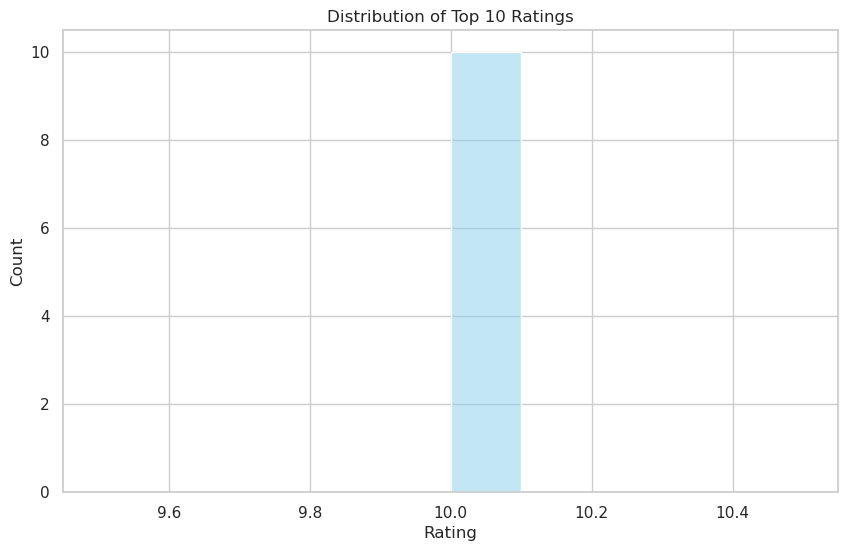

In [21]:
# Create visualizations using matplotlib and seaborn
# Example 1: Rating Distribution Plot
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(top_10_ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Top 10 Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [23]:
# Sort the DataFrame by average ratings in descending order
top_10_categories = average_rating_per_category.orderBy('average_rating', ascending=False).limit(10)

# Convert Spark DataFrame to Pandas for plotting
top_10_categories_pd = top_10_categories.toPandas()

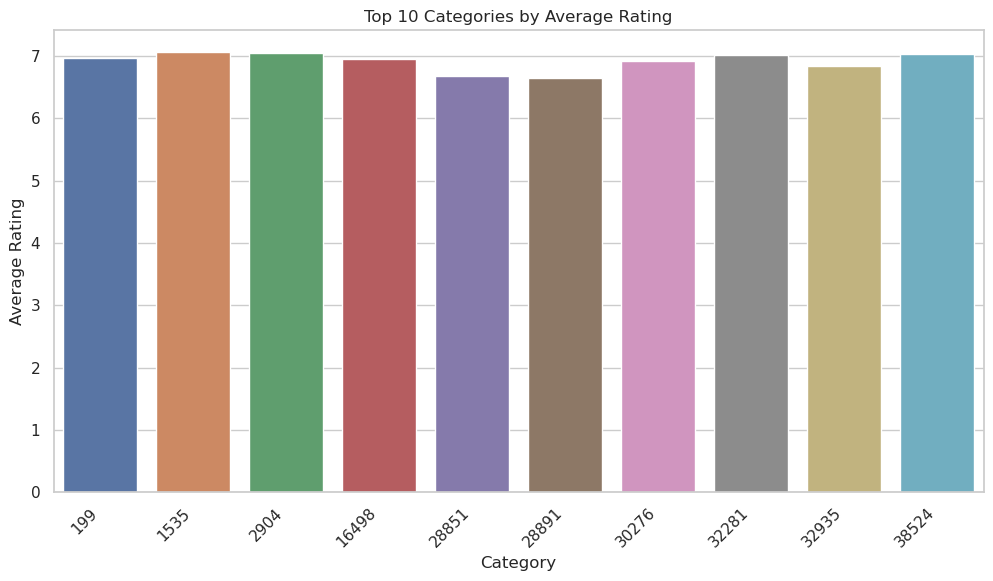

In [30]:
# Example 2: Average Rating per Category Bar Plot
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x="anime_id", y="average_rating", data=top_10_categories_pd)
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()